In [6]:
import pandas as pd 
import numpy as np 

In [11]:
df = pd.read_csv('titanic_missing_500.csv')
df.head()

,Survived,Age,Fare
0,1,6.0,20.6311
1,1,66.0,78.0443
2,1,55.0,7.1118
3,0,68.0,NaN
4,1,60.0,81.4435


In [12]:
df.isnull().mean() * 100

Survived    0.0
Age         2.2
Fare        2.0
dtype: float64

In [13]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
x_train.head()

,Age,Fare
238,23.0,96.4759
438,65.0,47.7097
475,19.0,88.6288
58,76.0,49.8953
380,59.0,49.8953


In [17]:
x_train['Age_imputer'] = x_train['Age']
x_test['Age_imputer'] = x_test['Age']

In [18]:
x_train.head()

,Age,Fare,Age_imputer
238,23.0,96.4759,23.0
438,65.0,47.7097,65.0
475,19.0,88.6288,19.0
58,76.0,49.8953,76.0
380,59.0,49.8953,59.0


In [22]:
x_train['Age_imputer'][x_train['Age_imputer'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputer'][x_test['Age_imputer'].isnull()] =  x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\91899\AppData\Local\Temp\ipykernel_6900\3848370668.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputer'][x_train['Age_imputer'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


ValueError: cannot set using a list-like indexer with a different length than the value

In [33]:
x_train.isnull().mean() * 100

Age            2.50
Fare           2.25
Age_imputer    0.00
dtype: float64

In [34]:
x_train

,Age,Fare,Age_imputer
238,23.0,96.4759,23.0
438,65.0,47.7097,65.0
475,19.0,88.6288,19.0
58,76.0,49.8953,76.0
380,59.0,49.8953,59.0
...,...,...,...
255,76.0,18.1543,76.0
72,65.0,87.9113,65.0
396,78.0,11.7827,78.0
235,65.0,NaN,65.0


In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns 

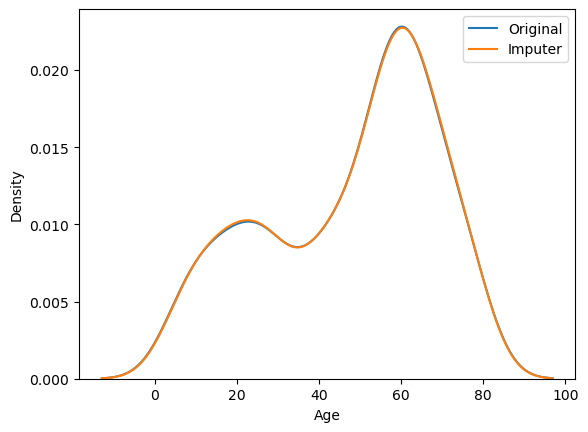

In [43]:
sns.kdeplot(x_train['Age'], label='Original')
sns.kdeplot(x_train['Age_imputer'], label='Imputer')
plt.legend()
plt.show()

In [44]:
print('Original variable variance', x_train['Age'].var())  
print('variables after random imputation', x_train['Age_imputer'].var())

Original variable variance 430.74183639839185
variables after random imputation 430.3862092731833


In [45]:
x_train[['Fare', 'Age', 'Age_imputer']].cov()

,Fare,Age,Age_imputer
Fare,844.813585,-29.239658,-30.064432
Age,-29.239658,430.741836,430.741836
Age_imputer,-30.064432,430.741836,430.386209


<Axes: >

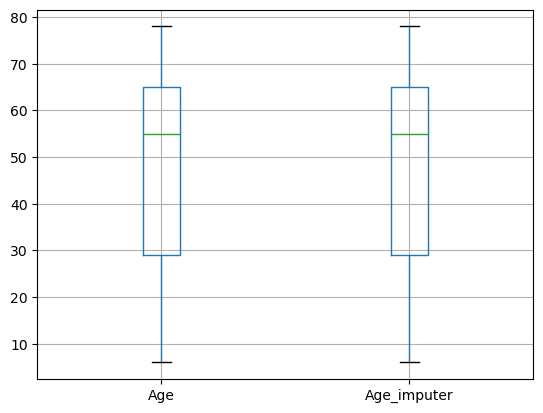

In [47]:
x_train[['Age', 'Age_imputer']].boxplot()

In [ ]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation=['Fare']))

In [48]:
data = pd.read_csv('house_quality_missing.csv')
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,NaN,283288
1,TA,Gd,177587
2,Ex,Po,398174
3,TA,Gd,94417
4,Fa,Ex,473391


In [50]:
data.isnull().mean() * 100

FireplaceQu    15.4
GarageQual     14.4
SalePrice       0.0
dtype: float64

In [51]:
x = data
y = data['SalePrice']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [53]:
x_train['data_FireplaceQu'] = x_train['FireplaceQu']
x_test['data_FireplaceQu'] = x_test['FireplaceQu']

x_train['data_GarageQual'] = x_train['GarageQual']
x_test['data_GarageQual'] = x_test['GarageQual']